<center><h1>-- Validating Potholes Using Object Detection on Monitoring and Report
System Application
 --</h1></center>

Author: ***B21-CAP0388***


---



Hi there, this is the tutorial for our Bangkit Capstone Project 2021 here:

https://github.com/anugrahakbarp/B21-CAP0388

---



# **<font color='fc3d79'>DATA PREPARATION</font>**

### A. Download and install the image labeling tools on your local computer here:

https://github.com/tzutalin/labelImg


### B. Scraping the image from the internet using selenium (USE WISELY)

Tutorial:

https://medium.com/analytics-vidhya/a-simple-selenium-image-scrape-from-an-interactive-google-image-search-on-mac-45d403e60d9a

### C. Create Annotation and labeling the images for YOLO darknet based (.txt format) might differ if you use another model.


Please see the tutorial on youtube about how you can make an own custom object detection dataset here:

https://www.youtube.com/watch?v=EGQyDla8JNU

### D. Go through https://app.roboflow.com/ (OPTIONAL)

--> create a project on object detection

--> upload your dataset

--> setting up your dataset (distribution value, image augmentation, etc)

--> download your own dataset ready to process

# **<font color='edc31c'>DATA TRAINING</font>**

### A. Setting up your google drive and mounting the colab project
    from google.colab import drive
    drive.mount('/content/drive')
### B. Cloning the Darknet YOLOV4 based model architecture

    !git clone https://github.com/AlexeyAB/darknet
### C. Verify the GPU (IF APPLICABLE)
    %cd darknet
    # UNCOMMENT IF USING GPU.
    # !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
    # !sed -i 's/GPU=0/GPU=1/' Makefile
    # !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
    # !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

    # verify CUDA
    !/usr/local/cuda/bin/nvcc --version

### D. Build the executable program from the repository using makefile
    # make sure you're on darknet folder
    !make
### E. Copy the config *(.cfg)* file to your drive

### F. Edit the config *(.cfg)* file on your own cases

I recommend having batch = 64 and subdivisions = 16 for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

### **Note: I set my max_batches = 6000, steps = 4800, 5400, I changed the classes = 1 in the three YOLO layers and filters = 18 in the three convolutional layers before the YOLO layers.**


How to Configure Your Variables:

***width = 416***

***height = 416*** (these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)
### **Note: Please IF you want to increase or decrease the size DON'T make the different to far from your original dataset (max 2 times larger/smaller), e.g. original dataset have an image with 150*150 pixels and you use 512 it will impact the result at the end.**

max_batches = (# of classes) * 2000 (but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)

steps = (80% of max_batches), (90% of max_batches) (so if your max_batches = 10000, then steps = 8000, 9000)

filters = (# of classes + 5) * 3 (so if you are training for one class then your filters = 18, but if you are training for 4 classes then your filters = 27)

***Optional: If you run into memory issues or find the training taking a super long time. In each of the three yolo layers in the cfg, change one line from random = 1 to random = 0 to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.***

### G. Creating *(.names)* and *(.data)* files
.names file *(for multilabel use enter at the end of each names)*

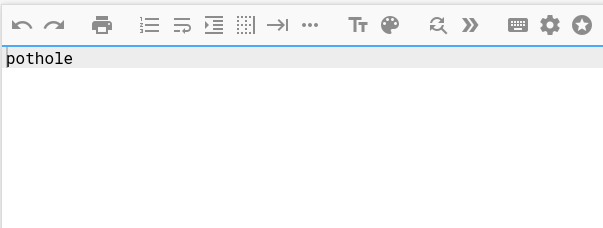

.data file
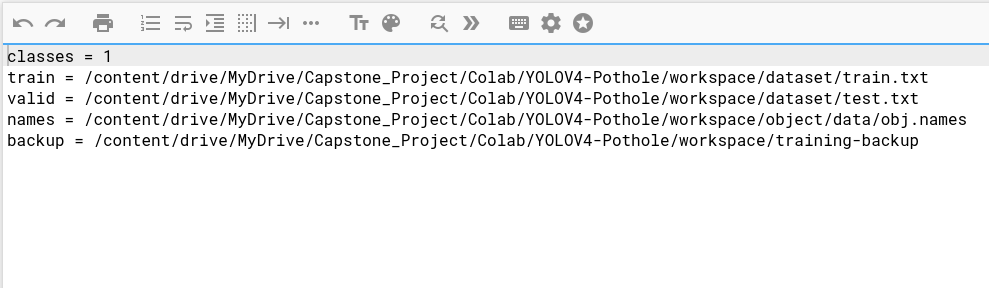

**Note: DON'T use white spaces if you have long label names**

**YES --> COVID_19**

**NO --> COVID 19**

### H. Generating the *(.txt)* files for each train and test set

Scripts use here:

https://github.com/anugrahakbarp/B21-CAP0388/tree/main/Machine-Learning/Scripts

Use the "generate_train.py" and "generate_test.py"

**Note: PLEASE EDIT WITH YOUR ENVIRONMENT PATH**

### I. Download the pretrained weights
    !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### J. Create Helper Function
    # define helper functions
    def imShow(path):
        import cv2
        import matplotlib.pyplot as plt
        %matplotlib inline

        image = cv2.imread(path)
        height, width = image.shape[:2]
        resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

        fig = plt.gcf()
        fig.set_size_inches(18, 10)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        plt.show()

    # use this to download a file  
    def download(path):
        from google.colab import files
        files.download(path)

**Note: Due to training time please use the function below to trigger maximum 12 hours on Google Colaboratory**

#HACKS
    function ClickConnect(){
    console.log("Working"); 
    document
        .querySelector('#top-toolbar > colab-connect-button')
        .shadowRoot.querySelector('#connect')
        .click() 
    }
    setInterval(ClickConnect,60000)
**Usage: Ctrl+shift+i --> Console menu --> Copy&Paste the function**

### K. Training Process

    !./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map

**Note: If you want to continue the training from your best weights, replace the pretrain weights to your weights path**

    !./darknet detector train <path to obj.data> <path to custom config> <path to your weights> -dont_show -map


# **<font color='1ddae0'>EVALUATING AND TESTING THE MODEL</font>**



### A. Getting the Mean Average Precision score
    #EVALUATION REPORT WITH MAP

    !./darknet detector map <path to obj.data> <path to custom config> <path to your weights>

### B. Testing the model
    %cd cfg
    !sed -i 's/batch=64/batch=1/' <path to custom config>
    !sed -i 's/subdivisions=64/subdivisions=1/' <path to custom config>
    %cd ..

    !./darknet detector test <path to obj.data> <path to custom config> <path to your weights> <path to your images> -thresh 0.3
    
    imShow('predictions.jpg')

**The result would look like this:**

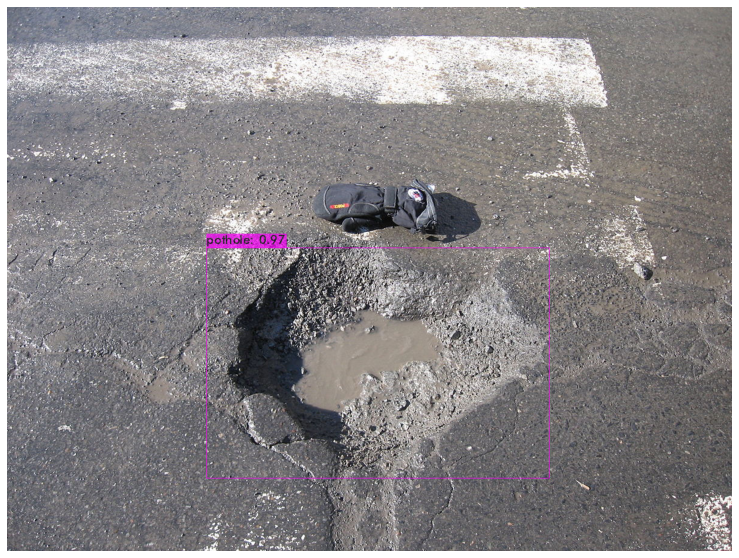

# **<font color='44db6c'>EXPORTING THE MODEL</font>**

### A. Client-Side Deployment
    %cd /content/drive/MyDrive/Capstone_Project/Colab/YOLOV4-Pothole
    !git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite.git
    !pip install tensorflow==2.3.0

    #####RESTART RUNTIME#####
    %cd /content/drive/MyDrive/Capstone_Project/Colab/YOLOV4-Pothole/tensorflow-yolov4-tflite

    # Making the frozen graph (.pb) files
    !python save_model.py --weights ./data/yolov4-custom_best.weights --output ./exported/pothole-yolov4 --input_size 416 --model yolov4 --framework tflite

    # Making the tflite files WITHOUT QUANTIZATION
    !python convert_tflite.py --weights ./exported/pothole-yolov4 --output ./exported/pothole-yolov4.tflite

    # Making the tflite files WITH INT8 QUANTIZATION
    !python convert_tflite.py --weights ./exported/pothole-yolov4 --output ./exported/pothole-yolov4-int8.tflite --quantize_mode int8 --dataset ./data/dataset/pothole-yolov4.txt

### B. Server-Side Deployment
Please check the readme files on github here: 
https://github.com/anugrahakbarp/B21-CAP0388/tree/main/Backend